In [1]:
# faceMask and faceMask2 hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 22/03/21

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.3
0.6.0


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data1 = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data1 = hddm.utils.flip_errors(data1)

# check dataset
data1.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,gc2le9xecjp1stz,0,3,angry,0,_faces/22_F_R_U.jpg,22_F_R_U,22,F,surprised,upper,0,-4.636150,0,0,0,0,0,50
1,gc2le9xecjp1stz,0,3,angry,1,_faces/07_M_H_L.jpg,07_M_H_L,7,M,happy,lower,0,-2.079460,0,0,0,50,0,0
2,gc2le9xecjp1stz,0,3,angry,2,_faces/46_M_R_X.jpg,46_M_R_X,46,M,surprised,baseline,0,-1.847670,0,0,0,0,0,100
3,gc2le9xecjp1stz,0,3,angry,3,_faces/47_M_S_L.jpg,47_M_S_L,47,M,sad,lower,0,-6.506275,0,0,0,0,50,0
4,gc2le9xecjp1stz,0,3,angry,4,_faces/25_M_R_X.jpg,25_M_R_X,25,M,surprised,baseline,0,-1.536780,0,0,0,0,0,100
5,gc2le9xecjp1stz,0,3,angry,5,_faces/27_F_A_U.jpg,27_F_A_U,27,F,angry,upper,1,1.906175,50,0,0,0,0,0
6,gc2le9xecjp1stz,0,3,angry,6,_faces/08_F_S_U.jpg,08_F_S_U,8,F,sad,upper,0,-2.182530,0,0,0,0,50,0
7,gc2le9xecjp1stz,0,3,angry,7,_faces/38_M_H_X.jpg,38_M_H_X,38,M,happy,baseline,0,-1.445230,0,0,0,100,0,0
8,gc2le9xecjp1stz,0,3,angry,8,_faces/30_M_A_U.jpg,30_M_A_U,30,M,angry,upper,1,1.405270,50,0,0,0,0,0
9,gc2le9xecjp1stz,0,3,angry,9,_faces/04_F_R_U.jpg,04_F_R_U,4,F,surprised,upper,0,-1.945385,0,0,0,0,0,50


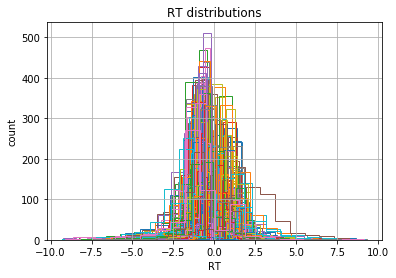

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (sad) and facial expression (sad)
ss1_data = data1.loc[(data1['emotionRating'] == 'sad') & (data1['expression'] == 'sad')]
ss1_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
212,gc2le9xecjp1stz,2,1,sad,216,_faces/71_M_S_X.jpg,71_M_S_X,71,M,sad,baseline,1,1.773800,0,0,0,0,100,0
213,gc2le9xecjp1stz,2,1,sad,217,_faces/33_M_S_L.jpg,33_M_S_L,33,M,sad,lower,1,1.060740,0,0,0,0,50,0
221,gc2le9xecjp1stz,2,1,sad,225,_faces/14_F_S_U.jpg,14_F_S_U,14,F,sad,upper,1,1.006610,0,0,0,0,50,0
227,gc2le9xecjp1stz,2,1,sad,231,_faces/20_M_S_X.jpg,20_M_S_X,20,M,sad,baseline,1,2.031125,0,0,0,0,100,0
231,gc2le9xecjp1stz,2,1,sad,236,_faces/14_F_S_X.jpg,14_F_S_X,14,F,sad,baseline,0,-1.401055,0,0,0,0,100,0
242,gc2le9xecjp1stz,2,1,sad,247,_faces/20_M_S_L.jpg,20_M_S_L,20,M,sad,lower,1,0.914565,0,0,0,0,50,0
254,gc2le9xecjp1stz,2,1,sad,259,_faces/61_F_S_L.jpg,61_F_S_L,61,F,sad,lower,0,-0.806490,0,0,0,0,50,0
262,gc2le9xecjp1stz,2,1,sad,267,_faces/33_M_S_X.jpg,33_M_S_X,33,M,sad,baseline,1,0.966425,0,0,0,0,100,0
263,gc2le9xecjp1stz,2,1,sad,268,_faces/20_M_S_U.jpg,20_M_S_U,20,M,sad,upper,0,-0.866050,0,0,0,0,50,0
272,gc2le9xecjp1stz,2,1,sad,277,_faces/31_F_S_L.jpg,31_F_S_L,31,F,sad,lower,1,1.286905,0,0,0,0,50,0


In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ss1_data = ss1_data[(ss1_data.subj_idx != 'ygpcur698h4dcw5') & (ss1_data.subj_idx != 'rc7s6vgpycw73ap') & (ss1_data.subj_idx != 'coppe66xbmkn6yj')]

In [6]:
# define model
m_ss1 = hddm.HDDMRegressor(ss1_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


In [7]:
# run model
m_ss1.sample(5000, burn=200, dbname='traces.db', db='pickle')

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 40203.5 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

TypeError: write() argument must be str, not bytes

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                         mean         std        2.5q         25q         50q        75q      97.5q       mc err
a                                     1.69561   0.0393241     1.61983     1.66904     1.69499    1.72156     1.7739   0.00110784
a_std                                 0.52757   0.0352644    0.463232    0.503463    0.526259   0.549825   0.604133   0.00105265
a_subj.02hcv424u29nd5w                 2.7723    0.310608     2.23119     2.54936     2.75155    2.97321    3.43656   0.00705799
a_subj.02k2uwlhgxnumn9                2.35196    0.344784     1.77388     2.10631     2.31855    2.55761    3.13273   0.00962349
a_subj.03g7h2hzq4o3g26                1.79903    0.212697     1.43656     1.65012     1.77968    1.93125    2.26526   0.00518707
a_subj.0nmr75cysk1ae0e                 2.5232    0.366002     1.91896     2.26342     2.48808    2.74733    3.34491   0.00945329
a_subj.0t8qp67pqkw36cb                1.59572    0.242729     1.19763     1.42303     1.57092    

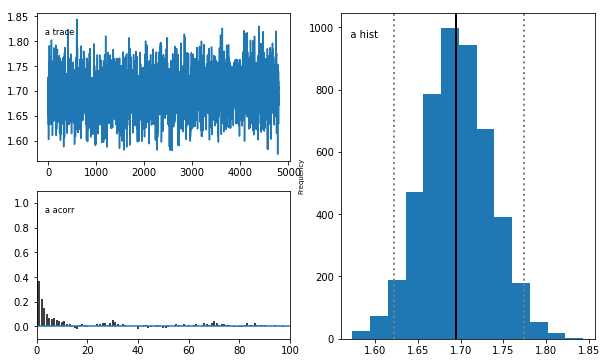

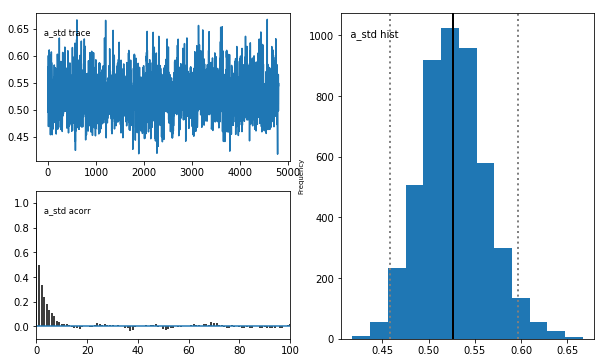

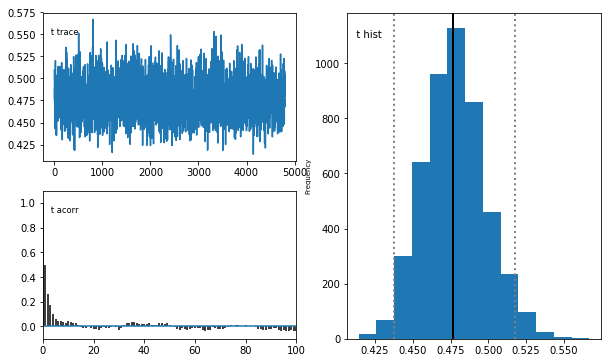

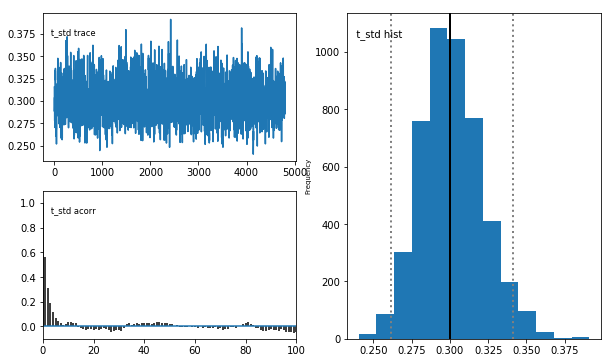

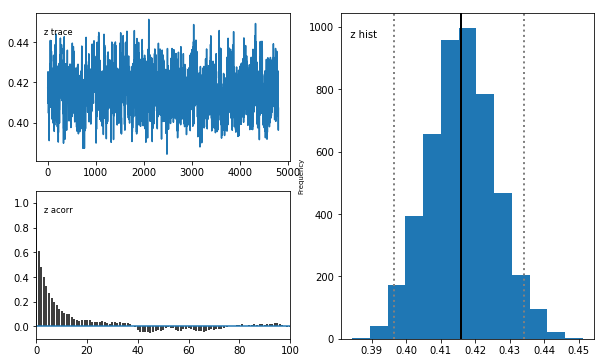

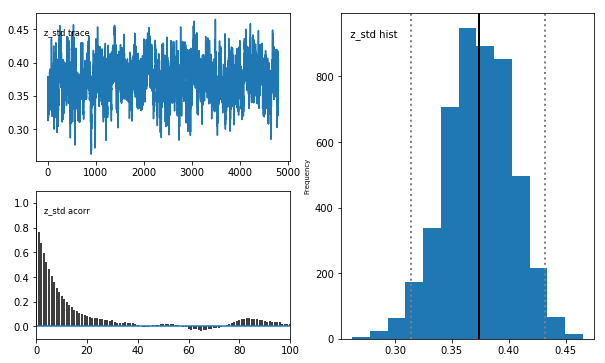

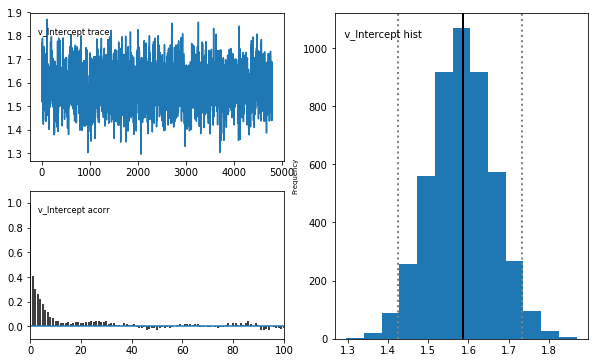

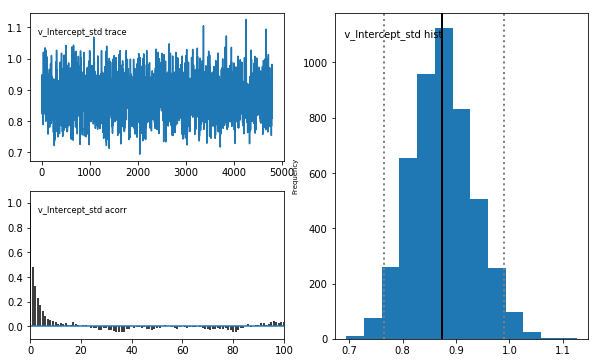

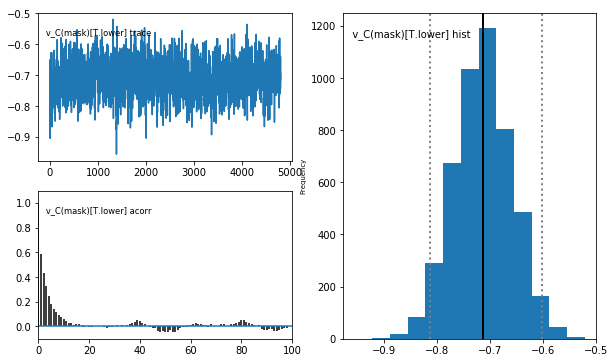

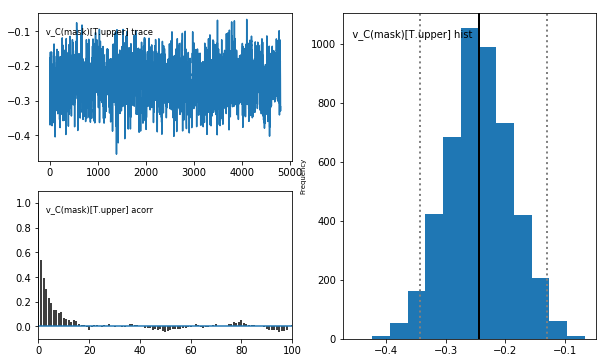

In [8]:
m_ss1.print_stats()
m_ss1.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                      mean        std      2.5q         25q  \
a                                  1.69561  0.0393241   1.61983     1.66904   
a_std                              0.52757  0.0352644  0.463232    0.503463   
a_subj.02hcv424u29nd5w              2.7723   0.310608   2.23119     2.54936   
a_subj.02k2uwlhgxnumn9             2.35196   0.344784   1.77388     2.10631   
a_subj.03g7h2hzq4o3g26             1.79903   0.212697   1.43656     1.65012   
a_subj.0nmr75cysk1ae0e              2.5232   0.366002   1.91896     2.26342   
a_subj.0t8qp67pqkw36cb             1.59572   0.242729   1.19763     1.42303   
a_subj.0vfpn4uf3t031qu               1.297   0.154542   1.03385     1.18874   
a_subj.11dsfdtym1yy5mx             1.53425   0.164378   1.24911     1.41811   
a_subj.1d3dadyu4ekqb4q             2.17394   0.372337   1.54148     1.91204   
a_subj.1mt2emp4645cbl1             1.72091   0.198765   1.38745     1.58169   
a_subj.1rst24mbtgy9rc8             1.82476   0.20850

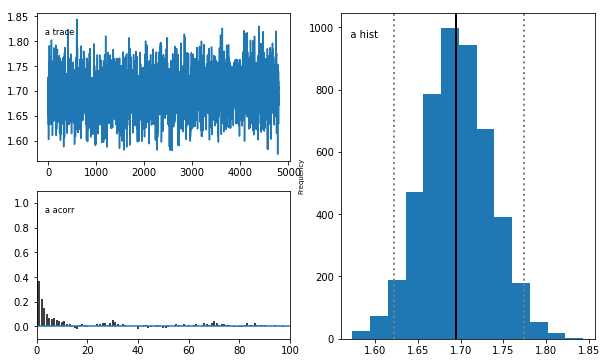

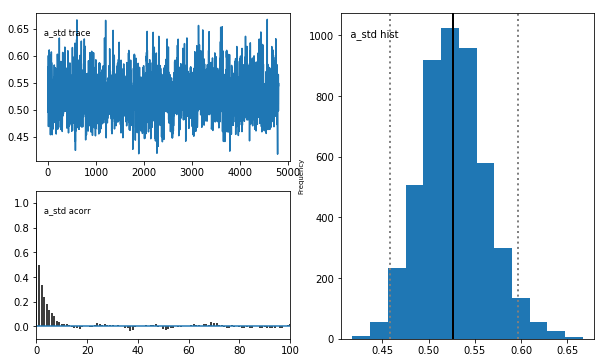

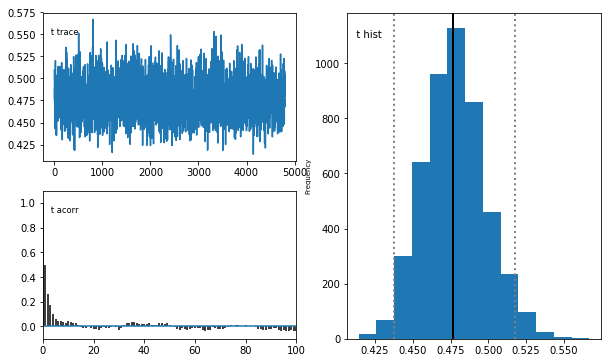

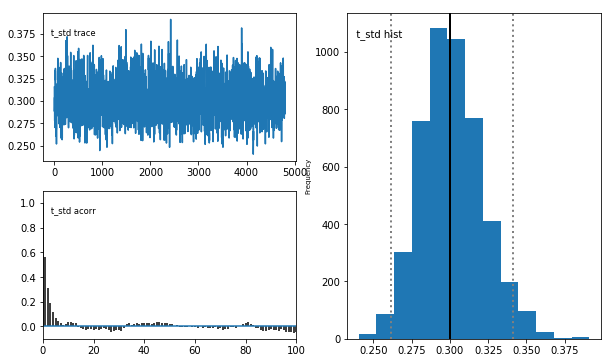

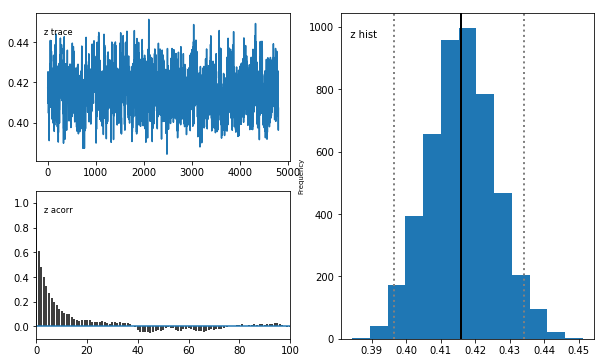

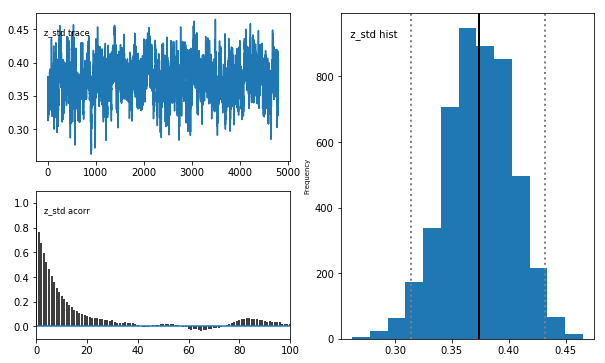

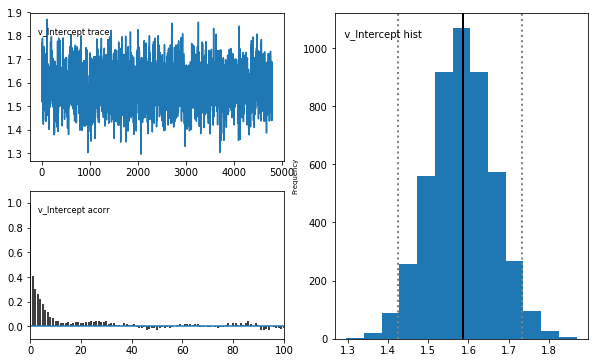

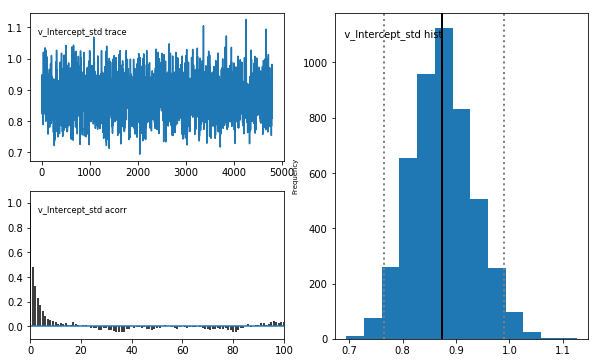

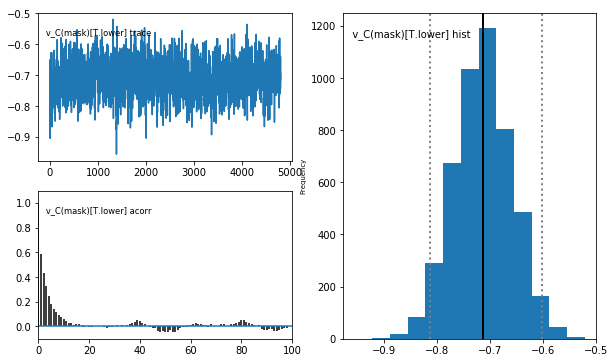

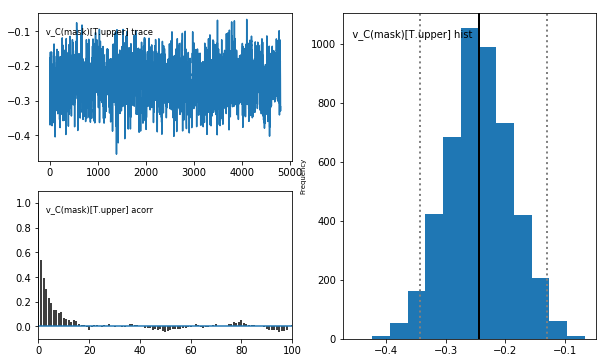

In [9]:
# save model stats
ss1_stats = m_ss1.gen_stats()
print(ss1_stats)
ss1_stats.to_csv('ss1_5000/faceMask_hddm_drift_maskFalseNegatives_ss1_5000.csv', index=True)

# save model posterior plots
m_ss1.plot_posteriors(path='ss1_5000/_posteriors', save=True)

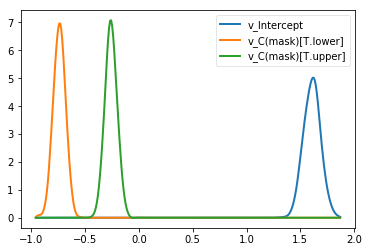

In [10]:
# plot model posteriors by mask
ss1_v_none, ss1_v_lower, ss1_v_upper = m_ss1.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ss1_v_none, ss1_v_lower, ss1_v_upper])
plt.savefig('ss1_5000/faceMask_hddm_drift_maskFalsePositives_ss1_5000_v_mask.pdf')

In [12]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ss1_v_none < 0) = ", (ss1_v_none.trace() < 0).mean())
print("P(ss1_v_lower > 0) = ", (ss1_v_lower.trace() > 0).mean())
print("P(ss1_v_upper > 0) = ", (ss1_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ss1_v_lower > ss1_v_upper) = ", (ss1_v_lower.trace() > ss1_v_upper.trace()).mean())

P(ss1_v_none < 0) =  0.0
P(ss1_v_lower > 0) =  0.0
P(ss1_v_upper > 0) =  0.0
P(ss1_v_lower > ss1_v_upper) =  0.0


In [13]:
# load hDDM-processed data from CSV file into a NumPy structured array
data2 = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data2 = hddm.utils.flip_errors(data2)

# check dataset
data2.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
0,lbmmswtrr0mpvov,0,3,surprised,0,_faces/HM08_F_X.jpg,HM08_F_X,HM08,H,M,fearful,baseline,1,2.248290,0,0,100,0,0,0
1,lbmmswtrr0mpvov,0,3,surprised,1,_faces/BM17_R_X.jpg,BM17_R_X,BM17,B,M,surprised,baseline,1,1.122130,0,0,0,0,0,100
2,lbmmswtrr0mpvov,0,3,surprised,2,_faces/WF05_S_X.jpg,WF05_S_X,WF05,W,F,sad,baseline,0,-1.093135,0,0,0,0,100,0
3,lbmmswtrr0mpvov,0,3,surprised,3,_faces/BM17_R_L.jpg,BM17_R_L,BM17,B,M,surprised,lower,1,1.347000,0,0,0,0,0,50
4,lbmmswtrr0mpvov,0,3,surprised,4,_faces/BF10_D_X.jpg,BF10_D_X,BF10,B,F,disgusted,baseline,0,-1.586875,0,100,0,0,0,0
5,lbmmswtrr0mpvov,0,3,surprised,5,_faces/BF15_F_L.jpg,BF15_F_L,BF15,B,F,fearful,lower,1,1.020070,0,0,50,0,0,0
6,lbmmswtrr0mpvov,0,3,surprised,6,_faces/AM07_S_X.jpg,AM07_S_X,AM07,A,M,sad,baseline,0,-1.092280,0,0,0,0,100,0
7,lbmmswtrr0mpvov,0,3,surprised,7,_faces/BF10_D_L.jpg,BF10_D_L,BF10,B,F,disgusted,lower,0,-1.574250,0,50,0,0,0,0
8,lbmmswtrr0mpvov,0,3,surprised,8,_faces/AM07_S_U.jpg,AM07_S_U,AM07,A,M,sad,upper,0,-1.219265,0,0,0,0,50,0
9,lbmmswtrr0mpvov,0,3,surprised,9,_faces/BM16_H_U.jpg,BM16_H_U,BM16,B,M,happy,upper,0,-1.092995,0,0,0,50,0,0


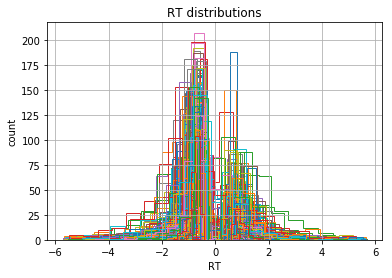

In [14]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data2.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [15]:
# subset dataset by emotion rating type (sad) and facial expression (sad)
ss2_data = data2.loc[(data2['emotionRating'] == 'sad') & (data2['expression'] == 'sad')]
ss2_data.head(10)

,subj_idx,block,faceList,emotionRating,trial,stimulus,face,model,ethnicity,sex,expression,mask,response,rt,faceAngry,faceDisgusted,faceFearful,faceHappy,faceSad,faceSurprised
111,lbmmswtrr0mpvov,2,1,sad,111,_faces/WM13_S_X.jpg,WM13_S_X,WM13,W,M,sad,baseline,1,0.804965,0,0,0,0,100,0
112,lbmmswtrr0mpvov,2,1,sad,112,_faces/WM13_S_U.jpg,WM13_S_U,WM13,W,M,sad,upper,1,0.732580,0,0,0,0,50,0
120,lbmmswtrr0mpvov,2,1,sad,120,_faces/HF09_S_U.jpg,HF09_S_U,HF09,H,F,sad,upper,0,-0.629785,0,0,0,0,50,0
126,lbmmswtrr0mpvov,2,1,sad,126,_faces/HF09_S_L.jpg,HF09_S_L,HF09,H,F,sad,lower,1,1.220135,0,0,0,0,50,0
140,lbmmswtrr0mpvov,2,1,sad,140,_faces/BF10_S_U.jpg,BF10_S_U,BF10,B,F,sad,upper,1,0.788105,0,0,0,0,50,0
148,lbmmswtrr0mpvov,2,1,sad,148,_faces/HF09_S_X.jpg,HF09_S_X,HF09,H,F,sad,baseline,1,0.676440,0,0,0,0,100,0
156,lbmmswtrr0mpvov,2,1,sad,156,_faces/WM13_S_L.jpg,WM13_S_L,WM13,W,M,sad,lower,1,1.050590,0,0,0,0,50,0
157,lbmmswtrr0mpvov,2,1,sad,157,_faces/BF10_S_X.jpg,BF10_S_X,BF10,B,F,sad,baseline,1,0.804625,0,0,0,0,100,0
160,lbmmswtrr0mpvov,2,1,sad,160,_faces/BF10_S_L.jpg,BF10_S_L,BF10,B,F,sad,lower,0,-1.750120,0,0,0,0,50,0
538,mr81dhy9r5lxu8r,4,3,sad,219,_faces/WF05_S_L.jpg,WF05_S_L,WF05,W,F,sad,lower,0,-2.206000,0,0,0,0,50,0


In [16]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ss2_data = ss2_data[(ss2_data.subj_idx != 'n1w02b847xslowd') & (ss2_data.subj_idx != 'me8doxrmo9vj9dx') & (ss2_data.subj_idx != 'hdn2l3df216jykn') & (ss2_data.subj_idx != 'dqph4ch0mkofejw')]

In [17]:
# define model
m_ss2 = hddm.HDDMRegressor(ss2_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 53011.8 sec

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                       mean         std       2.5q         25q        50q        75q      97.5q       mc err
a                                   1.57582    0.036343    1.50688      1.5511    1.57553    1.59878    1.65172   0.00122304
a_std                               0.44691   0.0323949   0.383883    0.425392   0.445508   0.467553   0.514815   0.00132881
a_subj.09coqg8hlpux6fe              1.27692    0.310618   0.797225     1.04672    1.23601    1.45936    1.99587    0.0101414
a_subj.0b3t2skj9mlhbkn              1.43061    0.242403     1.0306     1.25684    1.40728    1.57953    1.97388   0.00587646
a_subj.0bcg7mtj2n1jjw9              2.41829    0.453124     1.6885     2.09423    2.36632    2.68316    3.45544    0.0122389
a_subj.0s53r30oouek89b              2.38785    0.440236    1.65747     2.06952    2.34549    2.65479    3.38622    0.0110141
a_subj.0uj9gbhag3o1w1v              1.98755    0.305508    1.45997     1.76665    1.96629    2.17464      2.666   0.00696899


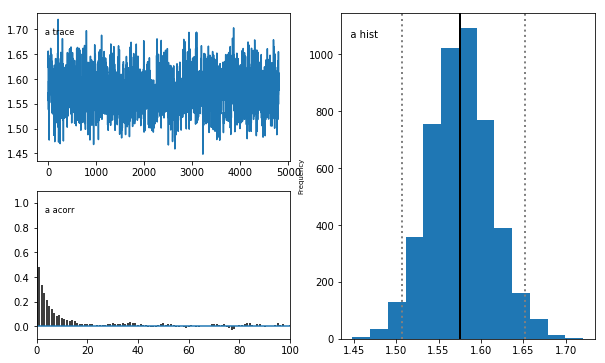

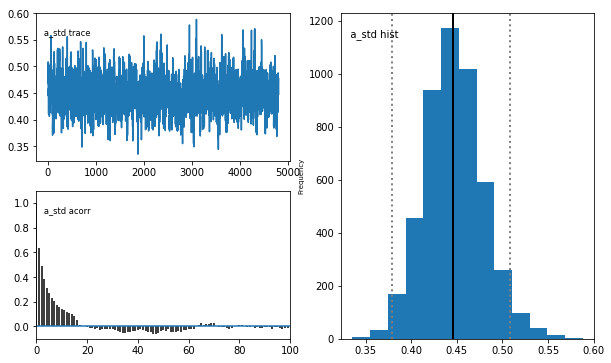

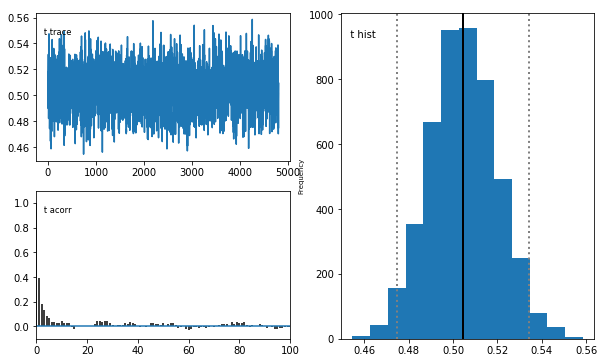

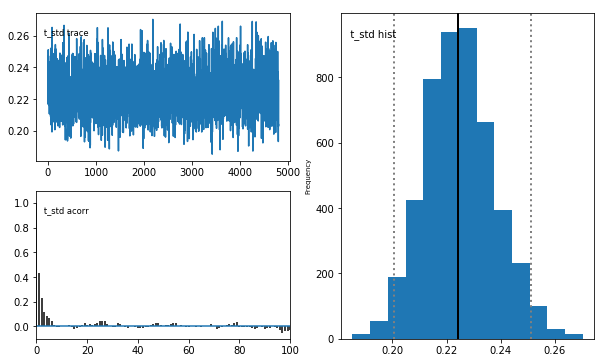

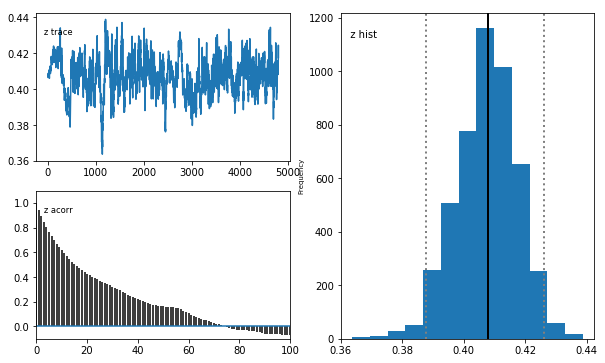

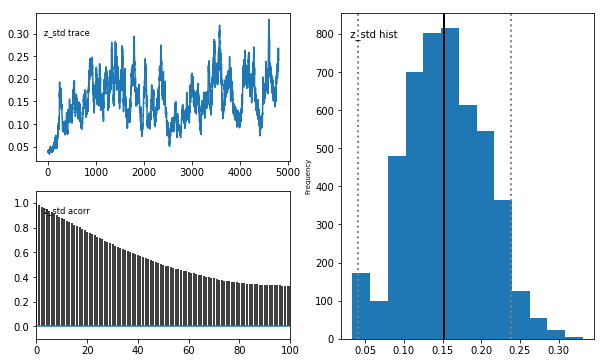

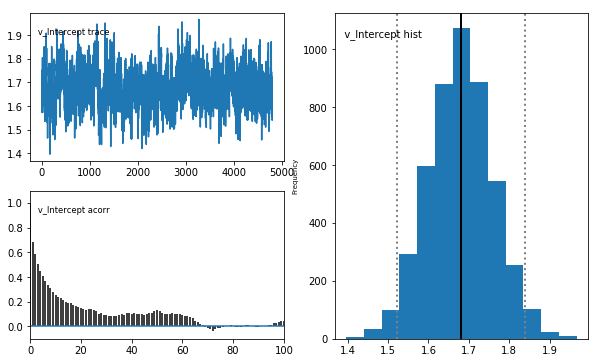

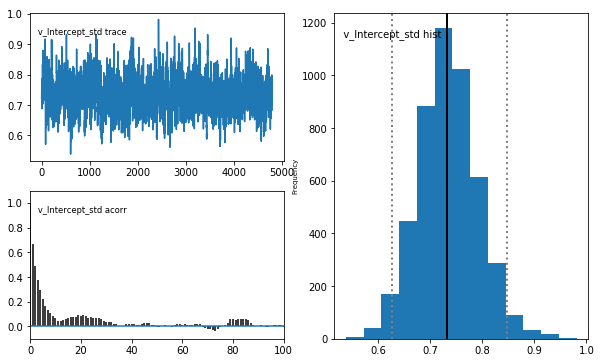

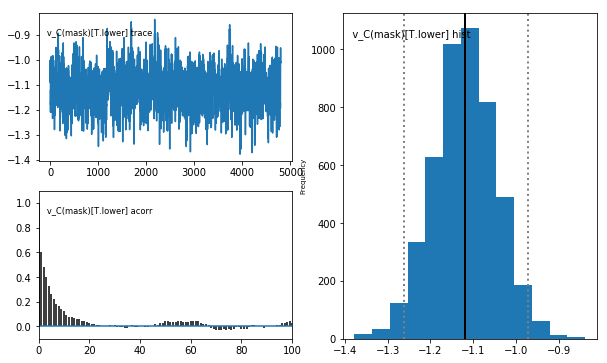

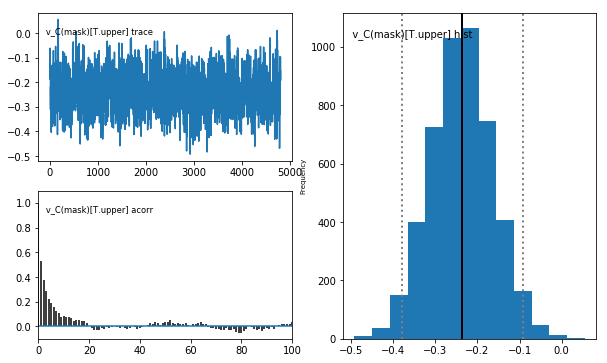

In [18]:
# run model
m_ss2.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ss2.print_stats()
m_ss2.plot_posteriors()

C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
C:\Users\tazee\Anaconda2\envs\hddm\lib\site-pack

                                      mean        std      2.5q       25q  \
a                                  1.57582   0.036343   1.50688    1.5511   
a_std                              0.44691  0.0323949  0.383883  0.425392   
a_subj.09coqg8hlpux6fe             1.27692   0.310618  0.797225   1.04672   
a_subj.0b3t2skj9mlhbkn             1.43061   0.242403    1.0306   1.25684   
a_subj.0bcg7mtj2n1jjw9             2.41829   0.453124    1.6885   2.09423   
a_subj.0s53r30oouek89b             2.38785   0.440236   1.65747   2.06952   
a_subj.0uj9gbhag3o1w1v             1.98755   0.305508   1.45997   1.76665   
a_subj.17nzn4k8r1qkmrn             1.46538   0.217965   1.10474   1.30862   
a_subj.1fdkw2qjx3hc3lk             1.27923   0.243328  0.881494   1.10264   
a_subj.1mla0dmotqefnav             1.55629   0.231499   1.16109   1.39049   
a_subj.23hr9tl84h3zhw3             1.62844   0.252395   1.19739   1.45202   
a_subj.27muqwvalwne26r             2.34604   0.336616   1.74347   2.10616   

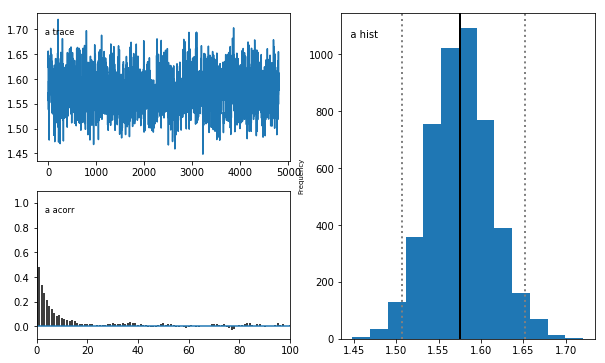

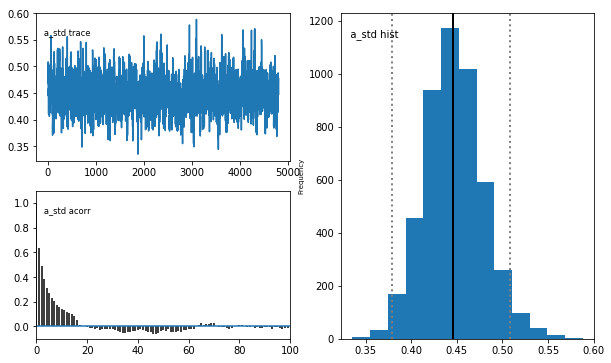

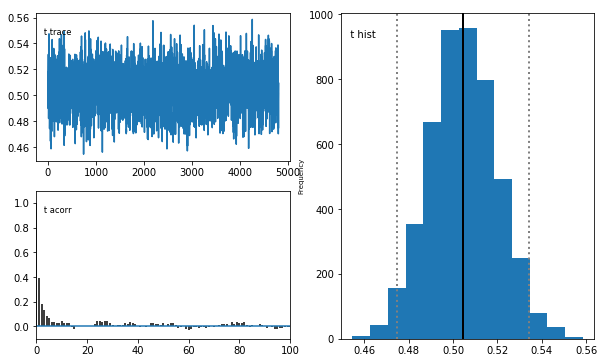

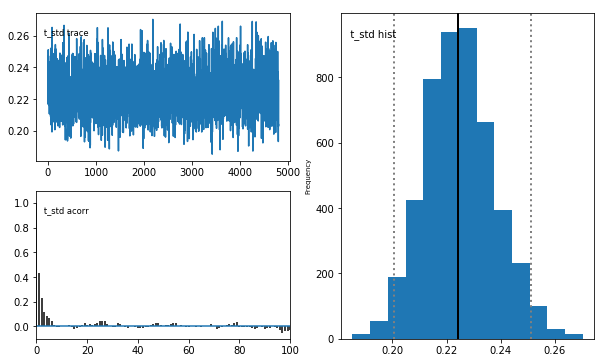

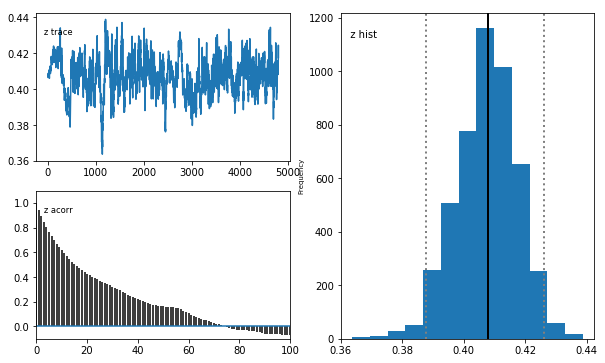

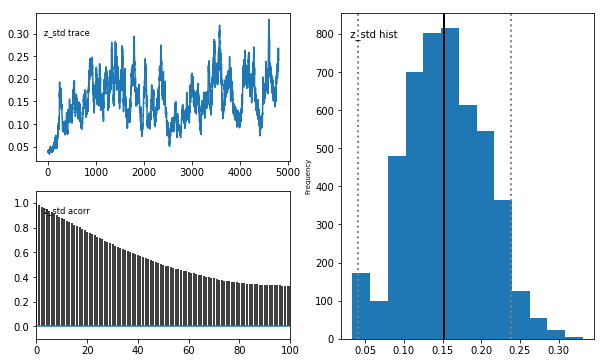

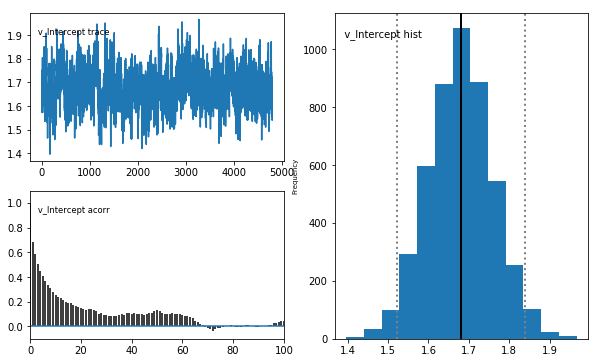

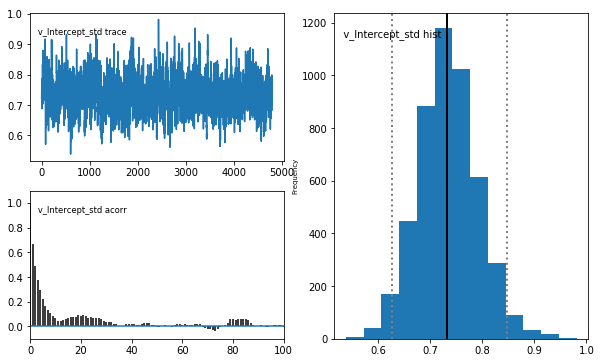

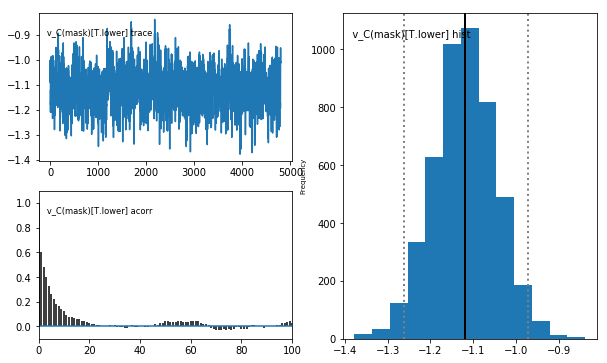

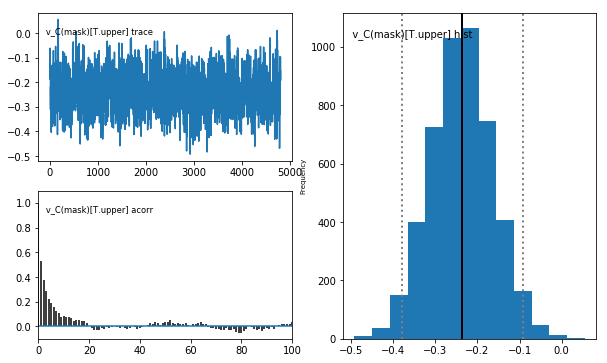

In [19]:
# save model stats
ss2_stats = m_ss2.gen_stats()
print(ss2_stats)
ss2_stats.to_csv('ss2_5000/faceMask2_hddm_drift_maskFalseNegatives_ss2_5000.csv', index=True)

# save model posterior plots
m_ss2.plot_posteriors(path='ss2_5000/_posteriors', save=True)

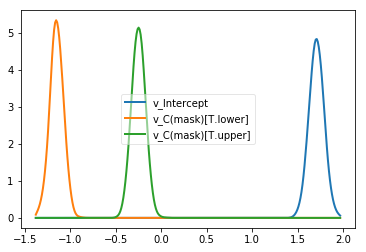

In [20]:
# plot model posteriors by mask
ss2_v_none, ss2_v_lower, ss2_v_upper = m_ss2.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ss2_v_none, ss2_v_lower, ss2_v_upper])
plt.savefig('ss2_5000/faceMask2_hddm_drift_maskFalsePositives_ss2_5000_v_mask.pdf')

In [22]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ss2_v_none < 0) = ", (ss2_v_none.trace() < 0).mean())
print("P(ss2_v_lower > 0) = ", (ss2_v_lower.trace() > 0).mean())
print("P(ss2_v_upper > 0) = ", (ss2_v_upper.trace() > 0).mean())
# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ss2_v_lower > ss2_v_upper) = ", (ss2_v_lower.trace() > ss2_v_upper.trace()).mean())

P(ss2_v_none < 0) =  0.0
P(ss2_v_lower > 0) =  0.0
P(ss2_v_upper > 0) =  0.00125
P(ss2_v_lower > ss2_v_upper) =  0.0


In [24]:
## estimate probabilities that mask coefficient posteriors differ from each other (faceMask 1 vs. faceMask2)
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ss1_v_none > ss2_v_none) = ", (ss1_v_none.trace() > ss2_v_none.trace()).mean())
print("P(ss1_v_lower < ss2_v_lower) = ", (ss1_v_lower.trace() < ss2_v_lower.trace()).mean())
print("P(ss1_v_upper > ss2_v_upper) = ", (ss1_v_upper.trace() > ss2_v_upper.trace()).mean())


P(ss1_v_none > ss2_v_none) =  0.191041666667
P(ss1_v_lower < ss2_v_lower) =  0.0
P(ss1_v_upper > ss2_v_upper) =  0.472916666667


In [25]:
## adding together the relative values:
ss1_v_none_plus_lower = ss1_v_none.trace() + ss1_v_lower.trace()
ss1_v_none_plus_upper = ss1_v_none.trace() + ss1_v_upper.trace()

ss2_v_none_plus_lower = ss2_v_none.trace() + ss2_v_lower.trace()
ss2_v_none_plus_upper = ss2_v_none.trace() + ss2_v_upper.trace()

In [27]:
print("P(ss1_v_none_plus_lower < ss2_v_none_plus_lower) = ", (ss1_v_none_plus_lower < ss2_v_none_plus_lower).mean())
print("P(ss1_v_none_plus_upper > ss2_v_none_plus_upper) = ", (ss1_v_none_plus_upper > ss2_v_none_plus_upper).mean())

P(ss1_v_none_plus_lower < ss2_v_none_plus_lower) =  0.000833333333333
P(ss1_v_none_plus_upper > ss2_v_none_plus_upper) =  0.180416666667
